# Two-body problem module: Analysis notebook

### Directory structure

```bash
celestia/
├── README.md
```

just files or classes and functions too?

### Relativistic vs. classical mechanics

##### (i) Use your module/script to run and show two simulations: one relativistic and one classical for this set of initial conditions. It may be helpful to compare the orbital history in a single plot.

| Parameter | Description                                       | Units      |
|-----------|---------------------------------------------------|------------|
| $e$       | Eccentricity of the orbit                         | $0$        |
| $M$       | Mass of the central black hole                    | $5\times 10^6\,\rm M_\odot$ |
| $a$       | Semi-major axis of the orbit                      | $1\,\rm AU$|
| $N$       | Number of orbital periods to simulate             | $2$        |
| Method    | Numerical method for ODE integration              | RK3        |

In [1]:
# Module import
from orbits import CelestialSeer, ChronoPainter

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Set parameters
M = 5e6 # Solar masses
a = 1.0 # AU
e = 0.0
N = 2.0

In [3]:
# Instantiate the integrator
orbital_sys = CelestialSeer(M, a, e, N)

In [4]:
# Classical case
t_class, S_class = orbital_sys.integrate(relativistic = False, N = N, method = 'RK3', save = True) 

# Relativistic case
t_relat, S_relat = orbital_sys.integrate(relativistic = True, N = N, method = 'RK3', save = True)

Saved to outputfolder/M5.0e+06-a1.0-e0.000-class-RK3.h5.
Saved to outputfolder/M5.0e+06-a1.0-e0.000-relat-RK3.h5.


In [5]:
# Define paths
class1 = "outputfolder/M5.0e+06-a1.0-e0.000-class-RK3.h5"
relat1 = "outputfolder/M5.0e+06-a1.0-e0.000-relat-RK3.h5"

# Create instance
painter = ChronoPainter(
    orbits = (class1, relat1),
    labels = ('Classical', 'Relativistic'),
    colors = ('khaki', 'magenta')
    )

In [6]:
# Animate
painter.paint(
    gif_name = "rel-vs-class.gif",
    frames = 50,
    duration = 0.5,
    dpi = 100,
    show = False
)

----------------------------------------------
            STARTING GIF CREATION
----------------------------------------------
Saving 50 frames...
----------------------------------------------
Progress: 0% (0 images)
Progress: 10% (5 images)
Progress: 20% (10 images)
Progress: 30% (15 images)
Progress: 40% (20 images)
Progress: 50% (25 images)
Progress: 60% (30 images)
Progress: 70% (35 images)
Progress: 80% (40 images)
Progress: 90% (45 images)
----------------------------------------------
All 50 images saved to outputfolder/images.
----------------------------------------------
Saving GIF...
----------------------------------------------
GIF saved to outputfolder/orbit-test-4.gif.
----------------------------------------------
            END OF GIF CREATION
----------------------------------------------
All images have been deleted.
----------------------------------------------


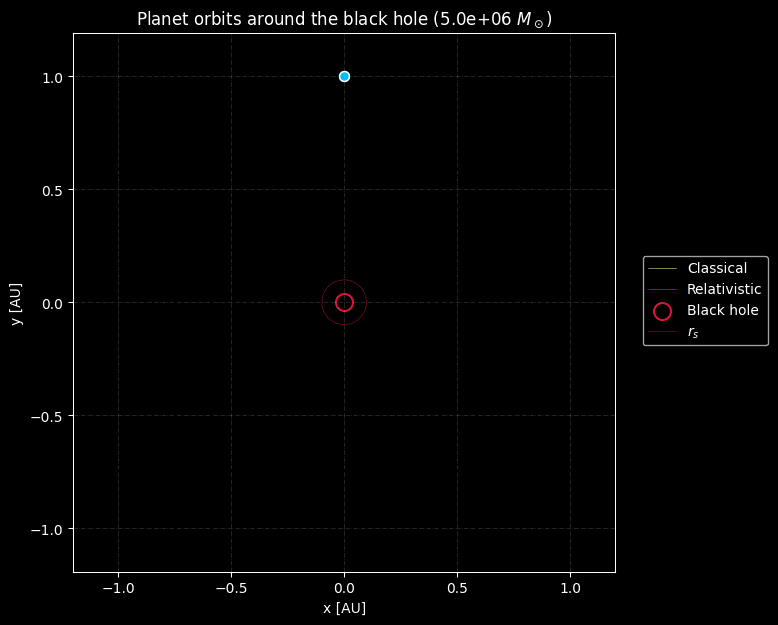

In [32]:
# Show it
painter.show_evolution("rel-vs-class.gif")

to ellaborate on: no precession

##### (j) Use the orbital history of both simulations to design a method that quantifies their differences and evaluates the importance of using the relativistic approach for massive objects. Do we need to worry about the relativistic corrections if we replace the black hole with our Sun?


In [8]:
# Sun
M_sun = 1 # Solar masses

# Create another instance
integrator2 = CelestialSeer(M_sun, a, e, N)

In [9]:
# Classical case
t_class2, S_class2 = integrator2.integrate(relativistic = False, N = N, method = 'RK3', save = True)

# Relativistic case
t_relat2, S_relat2 = integrator2.integrate(relativistic = True, N = N, method = 'RK3', save = True)

Saved to outputfolder/M1.0e+00-a1.0-e0.000-class-RK3.h5.
Saved to outputfolder/M1.0e+00-a1.0-e0.000-relat-RK3.h5.


In [11]:
# Define paths
class2 = "outputfolder/M1.0e+00-a1.0-e0.000-class-RK3.h5"
relat2 = "outputfolder/M1.0e+00-a1.0-e0.000-relat-RK3.h5"

# Create instance
painter2 = ChronoPainter(
    orbits = (class2, relat2),
    labels = ('Classical', 'Relativistic'),
    colors = ('khaki', 'magenta')
    )

In [12]:
# Animate
painter2.paint(
    gif_name = "rel-vs-class-sun.gif",
    frames = 50,
    duration = 0.5,
    dpi = 100,
    show = False
)

----------------------------------------------
            STARTING GIF CREATION
----------------------------------------------
Saving 50 frames...
----------------------------------------------
Progress: 0% (0 images)
Progress: 10% (5 images)
Progress: 20% (10 images)
Progress: 30% (15 images)
Progress: 40% (20 images)
Progress: 50% (25 images)
Progress: 60% (30 images)
Progress: 70% (35 images)
Progress: 80% (40 images)
Progress: 90% (45 images)
----------------------------------------------
All 50 images saved to outputfolder/images.
----------------------------------------------
Saving GIF...
----------------------------------------------
GIF saved to outputfolder/orbit-test-4.gif.
----------------------------------------------
            END OF GIF CREATION
----------------------------------------------
All images have been deleted.
----------------------------------------------


In [14]:
# Show it
# painter2.show_evolution("rel-vs-class-sun.gif")

short answer: no, we do not need to worry when the mass is that of the sun

### The role of eccentricity (3 points):

##### (k) Use your module/script to run and show three relativistic simulations for objects with different eccentricities, $e$, and assuming the same $M$, $a$, $N$ as above. It may be helpful to compare the orbital history for all values of $e$ in a single plot throughout time.

| Object           | Eccentricity ($e$) | Integration Method |
|------------------|--------------------|--------------------|
| Earth            | 0.01671            | Trapezoidal        |
| Pluto            | 0.25               | Trapezoidal        |
| 7092 Cadmus      | 0.70               | Trapezoidal        |

In [16]:
# Define eccentricities
e_earth  = 0.01671
e_pluto  = 0.25
e_cadmus = 0.70

In [22]:
# Create instances
earth_sys  = CelestialSeer(M, a, e_earth, N)
pluto_sys  = CelestialSeer(M, a, e_pluto, N)
cadmus_sys = CelestialSeer(M, a, e_cadmus, N)

# Integrate
t_earth, S_earth = earth_sys.integrate(relativistic = True, N = N, method = 'RK3', save = True)
t_pluto, S_pluto = pluto_sys.integrate(relativistic = True, N = N, method = 'RK3', save = True)
t_cadmus, S_cadmus = cadmus_sys.integrate(relativistic = True, N = N, method = 'RK3', save = True)

Saved to outputfolder/M5.0e+06-a1.0-e0.017-relat-RK3.h5.
Saved to outputfolder/M5.0e+06-a1.0-e0.250-relat-RK3.h5.
Saved to outputfolder/M5.0e+06-a1.0-e0.700-relat-RK3.h5.


In [23]:
# Define paths
earth = "outputfolder/M5.0e+06-a1.0-e0.017-relat-RK3.h5"
pluto = "outputfolder/M5.0e+06-a1.0-e0.250-relat-RK3.h5"
cadmus = "outputfolder/M5.0e+06-a1.0-e0.700-relat-RK3.h5"

# Create instance
painter3 = ChronoPainter(
    orbits = (earth, pluto, cadmus),
    labels = ('Earth', 'Pluto', 'Cadmus'),
    colors = ('khaki', 'magenta', 'white')
    )

In [24]:
# Animate
painter3.paint(
    gif_name = "diff_eccentricities.gif",
    frames = 50,
    duration = 0.5,
    dpi = 100,
    show = False
)

----------------------------------------------
            STARTING GIF CREATION
----------------------------------------------
Saving 50 frames...
----------------------------------------------
Progress: 0% (0 images)
Progress: 10% (5 images)
Progress: 20% (10 images)
Progress: 30% (15 images)
Progress: 40% (20 images)
Progress: 50% (25 images)
Progress: 60% (30 images)
Progress: 70% (35 images)
Progress: 80% (40 images)
Progress: 90% (45 images)
----------------------------------------------
All 50 images saved to outputfolder/images.
----------------------------------------------
Saving GIF...
----------------------------------------------
GIF saved to outputfolder/orbit-test-4.gif.
----------------------------------------------
            END OF GIF CREATION
----------------------------------------------
All images have been deleted.
----------------------------------------------


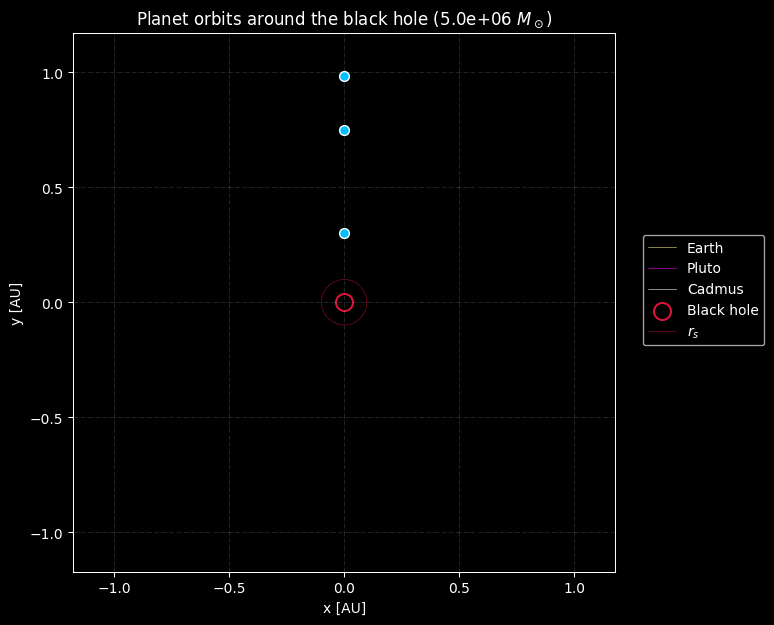

In [31]:
# Show it
painter3.show_evolution("diff_eccentricities.gif")

##### (l) Describe the differences in the orbits of the above objects. What happens to objects with high eccentricities?

to do

### Numerical convergence (3 points):

##### (m) Use your script to generate additional simulations with the same initial conditions as before, but only for $e=0.01671$ (Earth's eccentricity) with RK3, the Trapezoidal method and the higher-order SciPy integrator. Compare the orbital history for all methods in a single plot throughout time.

In [26]:
# Integrate
t_earth_tpz, S_earth_tpz = earth_sys.integrate(relativistic = True, N = 2.05, method = 'TPZ', save = True)
t_earth_spy, S_earth_spy = earth_sys.integrate(relativistic = True, N = 2.10, method = 'SPY', save = True)

Saved to outputfolder/M5.0e+06-a1.0-e0.017-relat-TPZ.h5.
Saved to outputfolder/M5.0e+06-a1.0-e0.017-relat-SPY.h5.


In [27]:
# Define paths
earth_tpz = "outputfolder/M5.0e+06-a1.0-e0.017-relat-TPZ.h5"
earth_spy = "outputfolder/M5.0e+06-a1.0-e0.017-relat-SPY.h5"

# Create instance
painter4 = ChronoPainter(
    orbits = (earth, earth_tpz, earth_spy),
    labels = ('RK3', 'TPZ', 'SPY'),
    colors = ('khaki', 'magenta', 'white')
    )

In [28]:
# Animate
painter4.paint(
    gif_name = "diff_methods.gif",
    frames = 50,
    duration = 0.5,
    dpi = 100,
    show = False
)

----------------------------------------------
            STARTING GIF CREATION
----------------------------------------------
Saving 50 frames...
----------------------------------------------
Progress: 0% (0 images)
Progress: 10% (5 images)
Progress: 20% (10 images)
Progress: 30% (15 images)
Progress: 40% (20 images)
Progress: 50% (25 images)
Progress: 60% (30 images)
Progress: 70% (35 images)
Progress: 80% (40 images)
Progress: 90% (45 images)
----------------------------------------------
All 50 images saved to outputfolder/images.
----------------------------------------------
Saving GIF...
----------------------------------------------
GIF saved to outputfolder/orbit-test-4.gif.
----------------------------------------------
            END OF GIF CREATION
----------------------------------------------
All images have been deleted.
----------------------------------------------


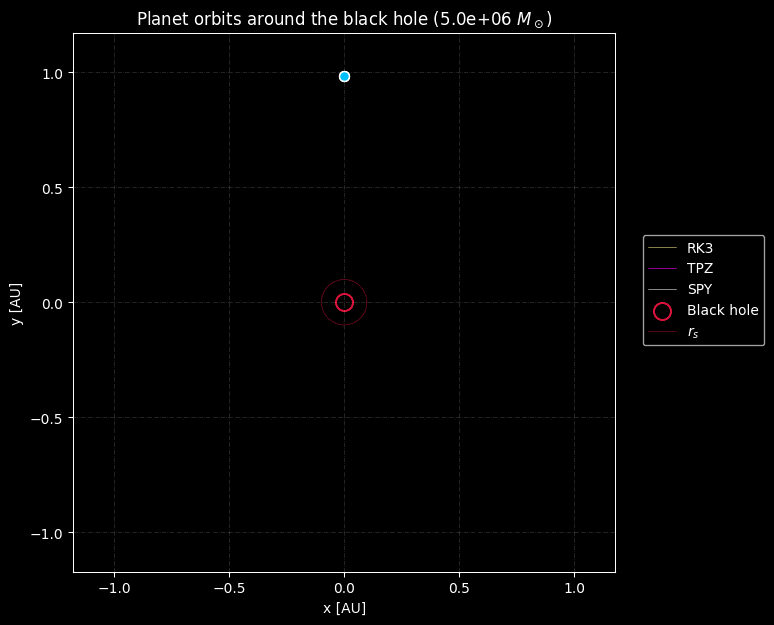

In [29]:
# Show it
painter4.show_evolution("diff_methods.gif")

no diff for $N=2$

##### (n) Measure convergence of the simulations with RK3 and Trapezoidal method for $e=0.01671$ by integrating at a number of different time steps. To analyse convergence, you need to define some measure for the error with respect to the higher order method, and then plot it against different time steps for both methods. Thus, you may add additional functions for this to your code in **orbits.py**. 